# COMP - L12: Databases Example 1

Step 1 is to import SQLite and connect to the database

In [3]:
import sqlite3

conn = sqlite3.connect('Weather.db')

We then delete the table WATHER and add to it

In [4]:
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS WEATHER')

WE then need to create a table to data. The table is named WEATHER and the data to be stored includes the ID, CITY, STATE, TEMPERATURE, and CONDITION. The ID is an integer (int), the CITY is a character string (CHAR(50), limited to 50 characters), the STATE is a character string (CHAR(2), limited to 2 characters), the TEMPERATURE is a floating point number (REAL), and the CONDITION is a character string (CHAR(50)).

In [5]:
cursor.execute('''
    CREATE TABLE WEATHER (          
    ID int primary key,
    CITY char(50),
    STATE char(2),
    TEMPERATURE real,
    CONDITION char(50))''')

We can then add rows of data into the table!

In [6]:
cursor.execute("INSERT INTO WEATHER (ID,CITY,STATE,TEMPERATURE,CONDITION) \
      VALUES (1, 'Ann Arbor', 'MI',32.1,'Light snow')")
cursor.execute("INSERT INTO WEATHER (ID,CITY,STATE,TEMPERATURE,CONDITION) \
      VALUES (2, 'Phoenix', 'AZ',73.4,'Sunny')")
cursor.execute("INSERT INTO WEATHER (ID,CITY,STATE,TEMPERATURE,CONDITION) \
      VALUES (3, 'New York', 'NY',52.9,'Sunny')")
cursor.execute("INSERT INTO WEATHER (ID,CITY,STATE,TEMPERATURE,CONDITION) \
      VALUES (4, 'New Orleans', 'LA',68.2,'Sunny')")
cursor.execute("INSERT INTO WEATHER (ID,CITY,STATE,TEMPERATURE,CONDITION) \
      VALUES (5, 'Seattle', 'WA',45.7,'Cloudy')")
conn.commit()

What if you leave one of the values blank?
    - This stores a NULL value within your table, but will likely mess up your row.

## Pulling data from the table

We use a for loop to fetch data from the table and display it.

You have to manually think about what data is stored where!

In [8]:
cursor = conn.execute("SELECT ID,CITY,STATE,TEMPERATURE,CONDITION from WEATHER")
for row in cursor:
   print("ID = ", row[0])
   print("CITY = ", row[1], " ,", row[2])
   print("TEMPERATURE = ", row[3])
   print("CONDITION = ", row[4], "\n")

ID =  1
CITY =  Ann Arbor  , MI
TEMPERATURE =  32.1
CONDITION =  Light snow 

ID =  2
CITY =  Phoenix  , AZ
TEMPERATURE =  73.4
CONDITION =  Sunny 

ID =  3
CITY =  New York  , NY
TEMPERATURE =  52.9
CONDITION =  Sunny 

ID =  4
CITY =  New Orleans  , LA
TEMPERATURE =  68.2
CONDITION =  Sunny 

ID =  5
CITY =  Seattle  , WA
TEMPERATURE =  45.7
CONDITION =  Cloudy 



## Updating records

We can update a record with the `update` command. Let's update the condidion in New Orleans from sunny to cloudy.

In [11]:
conn.execute("UPDATE WEATHER set CONDITION = 'Rain' where ID = 4")
conn.commit()

cursor = conn.execute("SELECT ID,CITY,STATE,TEMPERATURE,CONDITION from WEATHER")
for row in cursor:
    print("ID = ", row[0])
    print("CITY = ", row[1], " ,", row[2])
    print("TEMPERATURE = ", row[3])
    print("CONDITION = ", row[4], "\n")

ID =  1
CITY =  Ann Arbor  , MI
TEMPERATURE =  32.1
CONDITION =  Light snow 

ID =  2
CITY =  Phoenix  , AZ
TEMPERATURE =  73.4
CONDITION =  Sunny 

ID =  3
CITY =  New York  , NY
TEMPERATURE =  52.9
CONDITION =  Sunny 

ID =  4
CITY =  New Orleans  , LA
TEMPERATURE =  68.2
CONDITION =  Rain 

ID =  5
CITY =  Seattle  , WA
TEMPERATURE =  45.7
CONDITION =  Cloudy 



## Deleting records

We can delete ID = 2 from the table to clean up our records.

In [12]:
conn.execute("DELETE from WEATHER where ID = 2;")
conn.commit()

cursor = conn.execute("SELECT ID,CITY,STATE,TEMPERATURE,CONDITION from WEATHER")
for row in cursor:
   print("ID = ", row[0])
   print("CITY = ", row[1], " ,", row[2])
   print("TEMPERATURE = ", row[3])
   print("CONDITION = ", row[4], "\n")

ID =  1
CITY =  Ann Arbor  , MI
TEMPERATURE =  32.1
CONDITION =  Light snow 

ID =  3
CITY =  New York  , NY
TEMPERATURE =  52.9
CONDITION =  Sunny 

ID =  4
CITY =  New Orleans  , LA
TEMPERATURE =  68.2
CONDITION =  Rain 

ID =  5
CITY =  Seattle  , WA
TEMPERATURE =  45.7
CONDITION =  Cloudy 



When finished, we need to close the database.

In [13]:
conn.close()

## Example 2. Creating bar charts for temperature in the city!

The following code opens the database that was previously stored, and adds a row of data for the city Pittsburgh.

In [14]:
conn = sqlite3.connect('Weather.db') # Reconnect because we closed
cursor = conn.cursor() 
cursor.execute("INSERT INTO WEATHER (ID,CITY,STATE,TEMPERATURE,CONDITION) \
      VALUES (6, 'Pittsburgh', 'PA',50.9,'Cloudy')")
conn.commit() # Save table

cursor = conn.execute("SELECT ID,CITY,STATE,TEMPERATURE,CONDITION from WEATHER")
for row in cursor:
    print("ID = ", row[0])
    print("CITY = ", row[1], " ,", row[2])
    print("TEMPERATURE = ", row[3])
    print("CONDITION = ", row[4], "\n")

ID =  1
CITY =  Ann Arbor  , MI
TEMPERATURE =  32.1
CONDITION =  Light snow 

ID =  3
CITY =  New York  , NY
TEMPERATURE =  52.9
CONDITION =  Sunny 

ID =  4
CITY =  New Orleans  , LA
TEMPERATURE =  68.2
CONDITION =  Rain 

ID =  5
CITY =  Seattle  , WA
TEMPERATURE =  45.7
CONDITION =  Cloudy 

ID =  6
CITY =  Pittsburgh  , PA
TEMPERATURE =  50.9
CONDITION =  Cloudy 



Now lets see how to read data from the database. If opening it for the first time, you want to read the column headings ahead of time. To get just the headings, use this code:

In [15]:
# select all the data within the table
headings=cursor.execute('''SELECT * FROM WEATHER''') 
print(headings.description) # the .description stores the names

(('ID', None, None, None, None, None, None), ('CITY', None, None, None, None, None, None), ('STATE', None, None, None, None, None, None), ('TEMPERATURE', None, None, None, None, None, None), ('CONDITION', None, None, None, None, None, None))


To retrieve all data, we can use the `fetchall()` command.

In [16]:
cursor.execute('SELECT * FROM WEATHER')
data = cursor.fetchall() # we don't need a for loop!
print(data)

[(1, 'Ann Arbor', 'MI', 32.1, 'Light snow'), (3, 'New York', 'NY', 52.9, 'Sunny'), (4, 'New Orleans', 'LA', 68.2, 'Rain'), (5, 'Seattle', 'WA', 45.7, 'Cloudy'), (6, 'Pittsburgh', 'PA', 50.9, 'Cloudy')]


This uses the general format of [Array, (set), (set), (set)]. These are whats known as a `touple`, you can find more [HERE](https://www.w3schools.com/python/python_tuples.asp)

To see the data for one row (city) we can use the following code:

In [17]:
cursor.execute('SELECT * FROM WEATHER WHERE CITY="Pittsburgh"')
Pitt = cursor.fetchall()
print(Pitt)

[(6, 'Pittsburgh', 'PA', 50.9, 'Cloudy')]


If we want to know all the cities that are cloudy, we can do the following:

In [19]:
cursor.execute('SELECT * FROM WEATHER WHERE CONDITION="Cloudy"')
Cloudy = cursor.fetchall()
print(Cloudy)

conn.close()

[(5, 'Seattle', 'WA', 45.7, 'Cloudy'), (6, 'Pittsburgh', 'PA', 50.9, 'Cloudy')]


### Now to actually make the plot

First, we need a list containing the cities and the temperature data. We extract this data that we've created using the reading database. 

In [20]:
rows=len(data)
for i in range(0,rows):
    #Extract values from the tuple in row i of data
    x1,x2,x3,x4,x5 = data[i]

    if i==0:
        #Initialize list
        city=[x2]
        temperature=[x4]
    else:
        #Append to list
        city.append(x2)
        temperature.append(x4)
print(city, temperature)

['Ann Arbor', 'New York', 'New Orleans', 'Seattle', 'Pittsburgh'] [32.1, 52.9, 68.2, 45.7, 50.9]


We can then import `matplotlib` and plot our data!

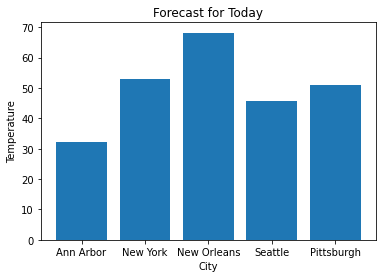

In [21]:
import matplotlib.pyplot as plt

plt.bar(city,temperature)
plt.title('Forecast for Today')
plt.xlabel('City')
plt.ylabel('Temperature')
plt.show()